In [22]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
#from skimage import data
import skimage.data
import skimage.transform
import skimage.color
import matplotlib.pyplot as plt 

## tests on tensorflow
(examples associated to tutorial 'https://www.datacamp.com/community/tutorials/tensorflow-tutorial')

### Develope on image clasification

#### 1.- we can recover and visualize data

In [13]:
### ...a function to load files with the characteristics of the images...
### ...FINALLY IT IS NOT USED, BUT WE LEAVE HERE AS EXAMPLE

def load_img_features(dir, root_file_name, ext_file_name):
    ### ...we list subfolders on input path...
    ### ...and we go through that list...
    for subfolder in os.listdir(dir):
        
        if os.path.isdir(dir + '/' + subfolder):
            ### ...we get the file content...
            subfolder_data_images = dir + '/' + subfolder + '/' + root_file_name + subfolder + ext_file_name
            data_images_in_subfolder = pd.read_csv(subfolder_data_images, sep = ';')
            
            ### ...and we create a dataframe to append all file content...
            if subfolder == '00000':
                data_images = data_images_in_subfolder
            else:
                data_images = data_images.append(data_images_in_subfolder, ignore_index=True)
    
    return data_images

In [14]:
### ...a function to load the images...

def load_img_data(dir):
    img_data = []
    img_name_file = []
    img_label = []
    
    ### ...in this loop, we go through de folders...
    for subfolder in os.listdir(dir):
        if os.path.isdir(dir + '/' + subfolder):
            
            ### ...in this loop we get the images of each folder...
            
            for file in os.listdir(dir + '/' + subfolder):
                if file.endswith(".ppm"):
                    img_name_file.append(file)
                    img_label.append(subfolder)
                    img_data.append(skimage.data.imread(dir + '/' + subfolder + '/' + file))
    
    ### ...optional, we can load images on pandas-dataframe...
    #data_images = pd.DataFrame({'Filename':img_name_file, 'data':img_data})
    #return data_images, img_name_file, img_data
    
    return img_name_file, img_label, img_data

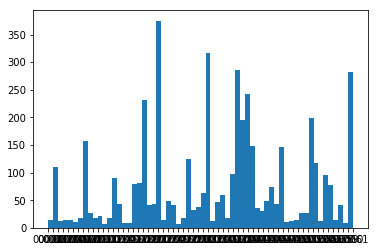

In [15]:
############################################
### ...cell to load images (using functions above)...
############################################

### ...we load the training data...
### ...WE WILL NOT USE THAT FUNCTION
#features_imgs = load_img_features('data-signal/Training', 'GT-', '.csv')


#data_imgs, img_name, img_data = load_img_data('data-signal/Training')
img_name, img_class, img_data = load_img_data('data-signal/Training')
#print(img_data[0])


### ...we make a histogram with 62 bins of the `labels` data
### ...in this way we can appreciate thethe number of signal of each class... 
plt.hist(np.asarray(img_class), 62)
plt.show()



#### We can observe several things in our dataset:
- Desbalanced set
- Images with different size (it imply different size of input variables in the net)
- The images are in RGB scale. To simplify the problem (without loss in clasification accuracy), we will convert the images to gray-scale

In [58]:
############################################
### ...we pre-process the images to solve some problems...
############################################
images28 = [skimage.transform.resize(img, (28, 28)) for img in img_data]
images28 = np.asarray(images28)


C:\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [59]:
### ...and we convert images to gray-scale...
images28 = skimage.color.rgb2gray(images28)
print(images28.shape)
print(images28[0][:][:])

(4575, 28, 28)
[[0.74229485 0.42599509 0.40878256 0.4202495  0.41755521 0.48030214
  0.44963976 0.44602086 0.47556737 0.49706019 0.50588577 0.64844137
  0.77811458 0.70713649 0.48676711 0.26363427 0.16729424 0.32515452
  0.24029734 0.28989687 0.34697073 0.31421003 0.22842276 0.23414764
  0.22509232 0.23291985 0.20067085 0.19750793]
 [0.60493667 0.29537234 0.29832879 0.29311906 0.31078613 0.2729798
  0.30964014 0.30606758 0.2903363  0.29848809 0.36972654 0.39749475
  0.45374504 0.45488612 0.37049333 0.18979712 0.12247736 0.34897782
  0.22131355 0.34215979 0.32304122 0.28913361 0.25752215 0.21609345
  0.19518954 0.21736126 0.21597678 0.22483184]
 [0.58464503 0.42008009 0.39497093 0.39232147 0.42208728 0.38122218
  0.44129249 0.44515486 0.40337708 0.44775028 0.60542391 0.77113115
  0.72724508 0.19550694 0.49441295 0.24845426 0.12977143 0.31427059
  0.25795989 0.31375262 0.30737058 0.29483936 0.25911204 0.22177856
  0.20446624 0.19452281 0.20801678 0.21786738]
 [0.60672073 0.43391981 0.429

#### 2.- We build our deep learning model

In [61]:
#imgs_input = [images28]
#28*28

### ...defining inputs...
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)

### ...and a layer full connected...
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
### ...a loss function...
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
### ...an optimizer... 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
### ...convert logits to label indexes...
correct_pred = tf.argmax(logits, 1)
### ...define an accuracy metric...
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))